<a href="https://colab.research.google.com/github/Fareed1810757/DLCV_Assignment1/blob/main/Assignment_1_(A%26B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='Surprise.jpg', quality=0.8): #save the other two images with different name
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to Surprise.jpg


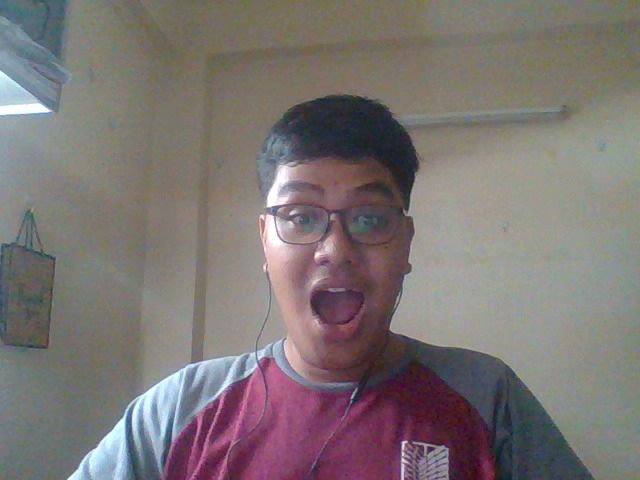

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

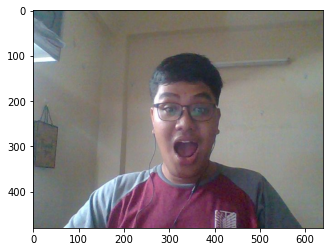

In [ ]:
img = cv2.imread("/content/Surprise.jpg") #edit the path and name of the captured image

color_coverted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow (color_coverted )
plt.show()

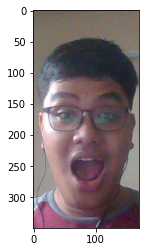

In [ ]:
face=color_coverted[50:400, 250:420]
plt.imshow(face)

In [ ]:
def displayImage(image):
    if len(image.shape)==3:
        face = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(face)
        plt.show()
        
    else:
        plt.imshow(image, cmap="gray")
        plt.show()

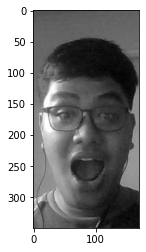

In [ ]:
grayImage = cv2.cvtColor(face, cv2.COLOR_RGB2GRAY)
displayImage(grayImage)

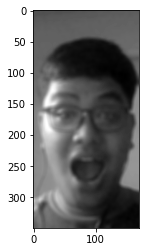

In [ ]:
imgBlur=cv2.GaussianBlur(grayImage,(7,7),4)
displayImage(imgBlur)

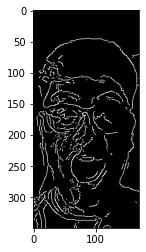

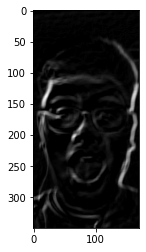

In [ ]:
# canny
imgCanny=cv2.Canny(imgBlur,20,30)

# sobel
sobelx = cv2.Sobel(imgBlur, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(imgBlur, cv2.CV_8U,0,1,ksize=3)
imgSobel = sobelx + sobely

displayImage(imgCanny)
displayImage(imgSobel)
